In [1]:
import sys
sys.path.insert(0, "/Users/oozguc/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook

In [2]:
targetdir = '/Users/oozguc/Desktop/'

Actinimage = '/Users/oozguc/Desktop/Actin_Linescan_confined.tif'

Membraneimage = '/Users/oozguc/Desktop/Membrane_Linescan_confined.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
FitaroundInside = 10
FitaroundOutside = 10
#Symmetric psf as input (micrometers)
psf = 0.170
showaftertime = 100
inisigmaguess =  psf
#Size of linescan
singleblock = 70
#skip me
skip = 10
#Number of segments
numsegments = 17
id = []
for i in range(0, numsegments):
    id.append(i)


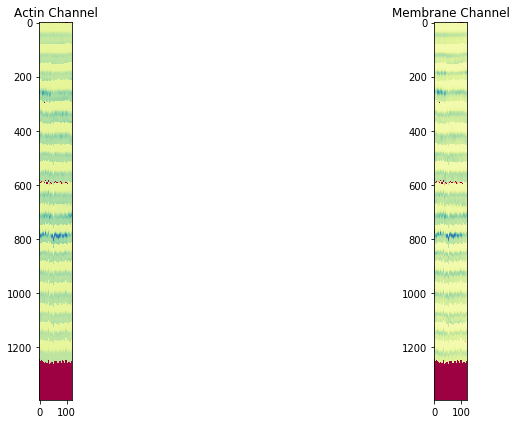

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


In [4]:
#Make blocks of images
blockimageActin = []
blockimageMembrane = []


for i in range(0, numsegments * singleblock, singleblock+skip):
   blockActin = Actin[i + 2:i + singleblock - 2,:]
   blockMembrane = Membrane[i + 2:i + singleblock - 2,:]
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   


block id 0


/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/oozguc/PyImage/utils/GaussFit.py:329: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


Time point: 0


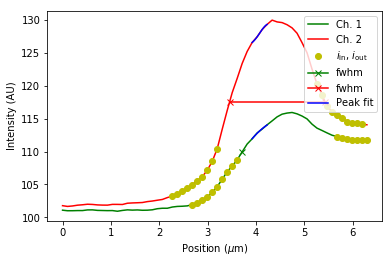

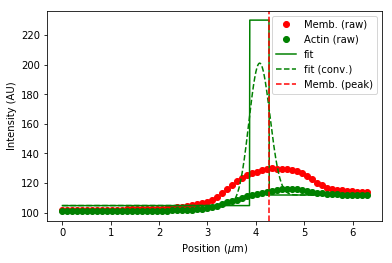

Time point: 100


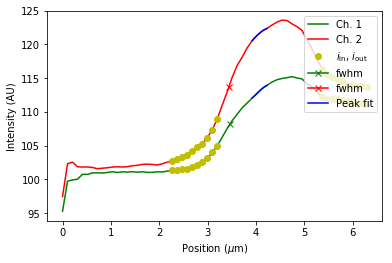

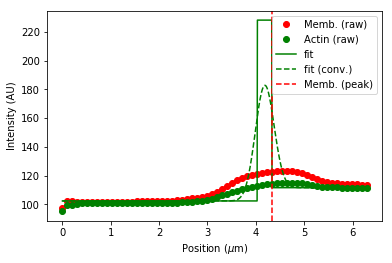

Ransac Slope =  1.346e-04
Regression Slope =  2.484e-02
Mean Thickness (After outlier removal) =  0.504 um


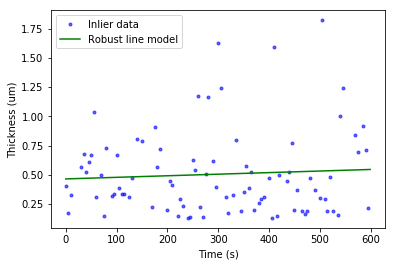

Loading BokehJS ...

8.405248656529958
block id 1
Time point: 0


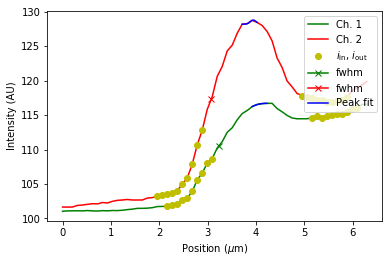

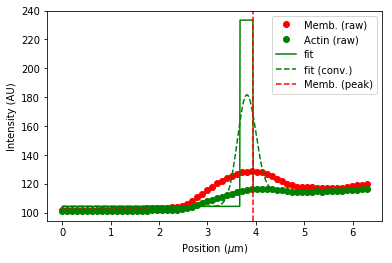

Time point: 100


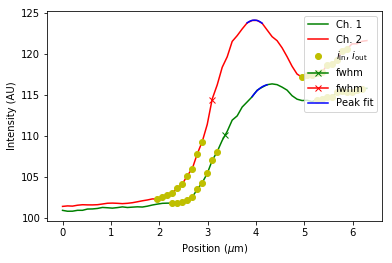

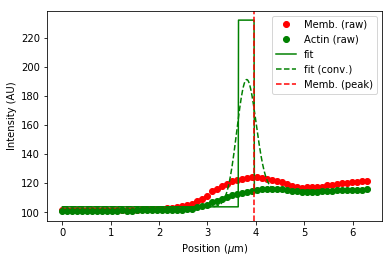

In [ ]:
%%time
#Fit all blocks

for i in range(0, len(blockimageActin)):
 print('block id', i + 1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, FitaroundInside, FitaroundOutside, psf, inisigmaguess, showaftertime)
 Thickness_time = np.column_stack([Time, Thickness])

   
 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.9, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
    
    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)
 print(np.mean(Thickness))